Name of Intern : $\textbf{Mayank Nagar}$


**Task - 2**

K- Means Clustering


Importing Necessary Libraries


In [24]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Load The Dataset


In [26]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing The Data


In [27]:
X = data.drop(['Id', 'Species'], axis=1)
y = data.Species

Total classes in Iris dataset


In [28]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Mapping the classes into numerical.


In [29]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

Spliting the dataset into training and test dataset.


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2)

Finding the optimum number of clusters for k-means classification


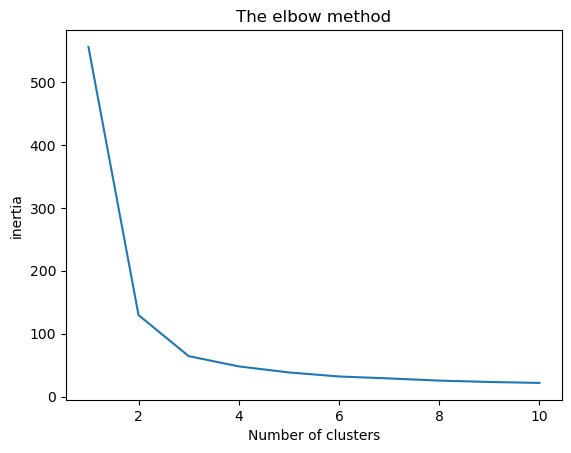

In [31]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

We can clearly see that why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.


# Training the algorithm.


In [32]:
model = KMeans(n_clusters=3, init = 'k-means++', random_state=42, n_init = 10, max_iter=25)
model.fit(x_train)

KMeans(max_iter=25, n_clusters=3, n_init=10, random_state=42)

Making predictions


In [33]:
prediction = model.predict(x_test)
acc = accuracy_score(y_test, prediction)
acc

0.2

Visualising the clusters


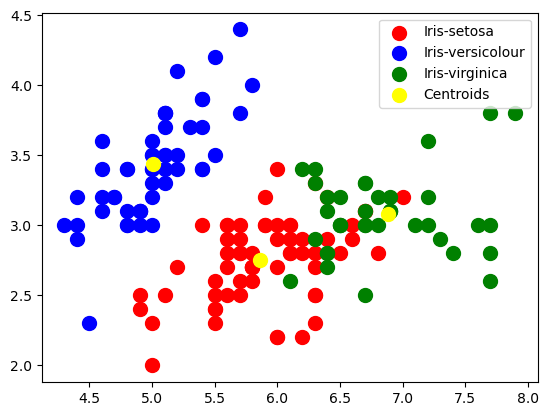

In [34]:
X = X.values
y_kmeans = model.predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()